In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#libs for data visulization & analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#machine learning methods
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
training = pd.read_csv("/kaggle/input/titanic/train.csv")
testing = pd.read_csv("/kaggle/input/titanic/test.csv")

In [19]:
print(training.shape)
print(training.columns)
print(training.isnull().sum())
# print(training.info())
print(training.head())
# print("\n")
# print(testing.info())
# training.describe()

(891, 13)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Died'],
      dtype='object')
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Died             0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily M

In [53]:
# EXPLORATORY DATA ANALYSIS

# training['Sex'].value_counts()
training['Embarked'].value_counts()
# sns.countplot(x = 'Pclass', data = training)
# sns.countplot(x = 'Embarked', data = training)  # C = Cherbourg, Q = Queenstown, S = Southampton
# sns.countplot(x = 'SibSp', data = training)
# sns.countplot(x = 'Survived', data = training)
# sns.countplot(x = 'Sex', data = training)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

        Survived  Died
Sex                   
female       233    81
male         109   468


<AxesSubplot:xlabel='Sex'>

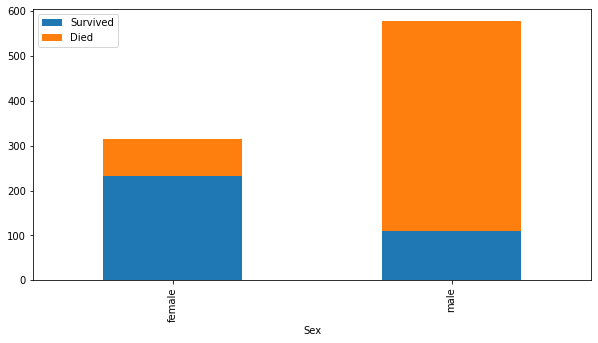

In [56]:
# SEEING IF SURVIVAL RATE VARIES BY GENDER

#  Adding new "Died" column to get survival rate
training['Died'] = 1 - training['Survived']

t1 = training.groupby('Sex').agg('sum')[['Survived', 'Died']]
print(t1)
      
t1.plot(kind='bar',figsize = (10,5),stacked = True) 

<AxesSubplot:xlabel='Sex'>

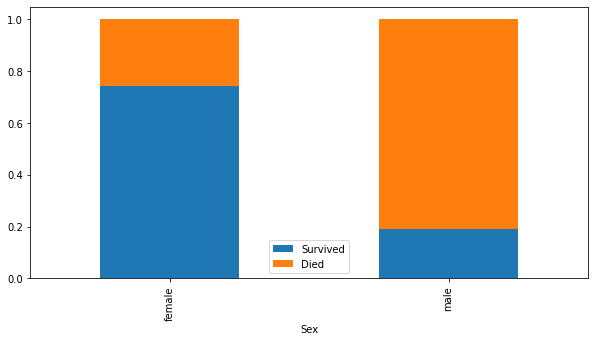

In [46]:
# Same as above but shown as % of gender surviving
training.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar',
                                                               figsize = (10,5),
                                                               stacked = True
                                                              )

In [47]:
# Does Survival rate vary by Pclass?

training.groupby('Pclass').agg('mean')[['Survived', 'Died']].plot(kind='bar',
                                                               figsize = (10,5),
                                                               stacked = True
                                                              )

<AxesSubplot:xlabel='Embarked'>

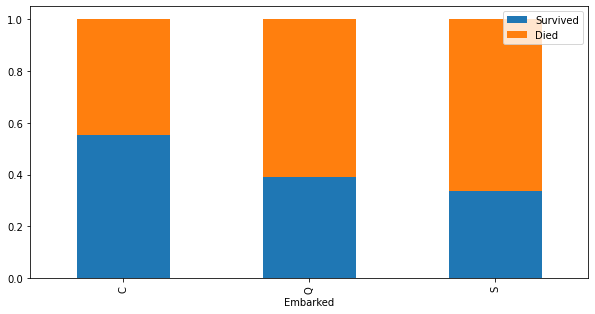

In [54]:
# Does Survival rate vary by Embarked?

training.groupby('Embarked').agg('mean')[['Survived', 'Died']].plot(kind='bar',
                                                               figsize = (10,5),
                                                               stacked = True
                                                              ) 

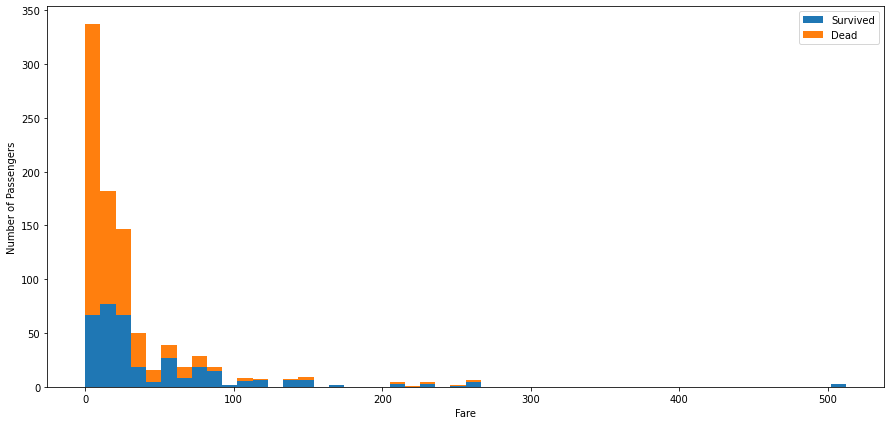

In [16]:
#  VISUALIZING SURVIVAL BASED ON FARE

figure = plt.figure(figsize=(15,7))

plt.hist([training[training['Survived'] == 1]['Fare'], training[training['Died'] == 1]["Fare"]],
         stacked = True,
         bins = 50, 
         label = ['Survived', 'Dead']
        )
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

# very few passengers with high fares died 

In [59]:
# CREATING A FEATURE: "TITLE"

# Let's see if I can extract the titles for each passenger ("Sir", "Mr.", "Miss", etc.)
# training["Name"] is in format: "[lastname], [title]. [first name]"
# ** this only works because all passengers have a title

# Can isolate the title by splitting on "," and taking the second part, then splitting on "." and taking the first part

titles = set()
part1 = ""
part2 = ""

for name in training['Name']:
    part1 = name.split(',')[1]
    part2 = part1.split('.')[0]
    titles.add(part2.strip())
    
print(titles)

In [ ]:
# adding "Title" column to data

training["Title"] = 


In [11]:
train_x = training[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train_y = training[['Survived']]

test_x = testing[train_x.columns.values]
print(training.shape, train_x.shape, train_y.shape, test_x.shape)

(891, 13) (891, 7) (891, 1) (418, 7)


In [12]:
train_y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [13]:
train_x.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C
